# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

## 한국어 형태소 분석기 설치

In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.0 MB/s 
     |████████████████████████████████| 453 kB 44.8 MB/s 


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [6]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x # bash-x 실행해달라

+ pip install konlpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/etc/os-release:PRETTY_NAME="Ubuntu 18.04.5 LTS"
/etc/os-release:HOME_URL="https://www.ubuntu.com/"
/etc/os-release:SU

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [9]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()

In [10]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

In [11]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [12]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [13]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

* t-sne을 이용한 단어 벡터 시각화

In [15]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [16]:
vocab = word2vec.wv.vocab
similarity= word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.38120356,  0.02261857, -0.2846466 , ...,  0.23243755,
         0.48780334, -0.07020233],
       [ 0.8203833 , -0.11540788, -0.6285786 , ...,  0.32494986,
         1.0739039 ,  0.12392037],
       [ 0.49057347, -0.62589645, -0.28194153, ...,  0.7001641 ,
         1.0463946 , -0.5892279 ],
       ...,
       [ 0.04386749,  0.01077721, -0.04441807, ...,  0.03208549,
         0.0700191 ,  0.0011919 ],
       [ 0.04020481,  0.00828564, -0.03029142, ...,  0.02917252,
         0.05766265,  0.01956732],
       [ 0.05662758,  0.012126  , -0.04935779, ...,  0.0257817 ,
         0.06672218, -0.00665441]], dtype=float32)

In [17]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x','y'])
df[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x,y
어릴,-32.109364,5.881332
때,-42.779388,-32.081974
보,-47.395859,-36.963230
고,-46.498737,-36.421803
지금,-46.174603,-32.779106
다시,-47.838135,-34.977985
봐도,-48.624863,-34.494026
재밌,-59.525013,-29.321913
어요,-58.784157,-28.323948
ㅋㅋ,-61.462627,-26.822344


## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [18]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([3, 0, 0, ..., 4, 4, 4])

In [22]:
results = df
results['predict'] = predict
results[0:10]

,x,y,redict,predict
어릴,-32.109364,5.881332,3,3
때,-42.779388,-32.081974,0,0
보,-47.395859,-36.963230,0,0
고,-46.498737,-36.421803,0,0
지금,-46.174603,-32.779106,0,0
다시,-47.838135,-34.977985,0,0
봐도,-48.624863,-34.494026,0,0
재밌,-59.525013,-29.321913,0,0
어요,-58.784157,-28.323948,0,0
ㅋㅋ,-61.462627,-26.822344,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


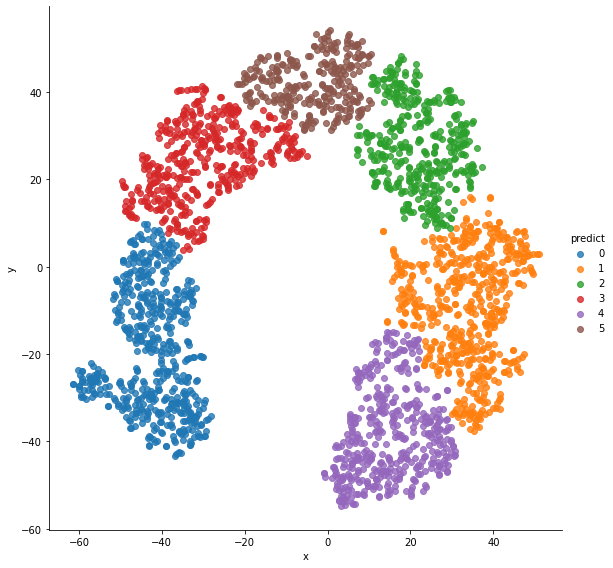

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot('x','y',data=results, fit_reg=False, size=8, hue='predict')
plt.show()

#### average

In [25]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([3, 0, 0, ..., 4, 4, 4])

In [26]:
results = df
results['predict'] = predict
results[0:10]

,x,y,redict,predict
어릴,-32.109364,5.881332,3,3
때,-42.779388,-32.081974,0,0
보,-47.395859,-36.963230,0,0
고,-46.498737,-36.421803,0,0
지금,-46.174603,-32.779106,0,0
다시,-47.838135,-34.977985,0,0
봐도,-48.624863,-34.494026,0,0
재밌,-59.525013,-29.321913,0,0
어요,-58.784157,-28.323948,0,0
ㅋㅋ,-61.462627,-26.822344,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


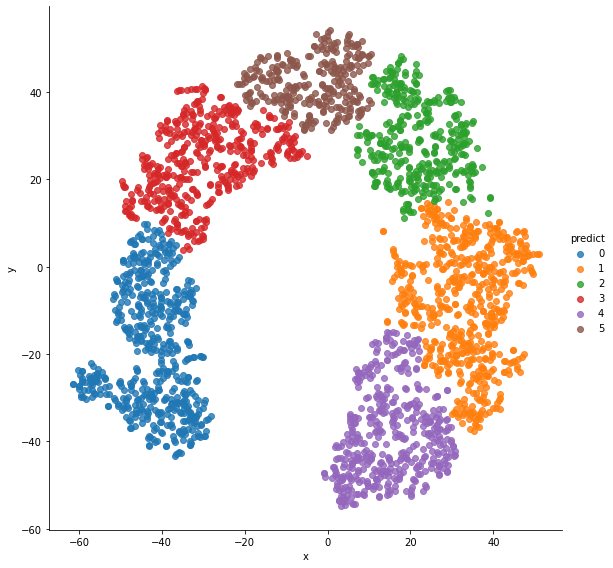

In [27]:
sns.lmplot('x','y',data=results, fit_reg=False, size=8, hue='predict')
plt.show()

#### complete

In [28]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = avg.fit_predict(df)
predict

array([3, 0, 0, ..., 4, 4, 4])

In [29]:
results = df
results['predict'] = predict
results[0:10]

,x,y,redict,predict
어릴,-32.109364,5.881332,3,3
때,-42.779388,-32.081974,0,0
보,-47.395859,-36.963230,0,0
고,-46.498737,-36.421803,0,0
지금,-46.174603,-32.779106,0,0
다시,-47.838135,-34.977985,0,0
봐도,-48.624863,-34.494026,0,0
재밌,-59.525013,-29.321913,0,0
어요,-58.784157,-28.323948,0,0
ㅋㅋ,-61.462627,-26.822344,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


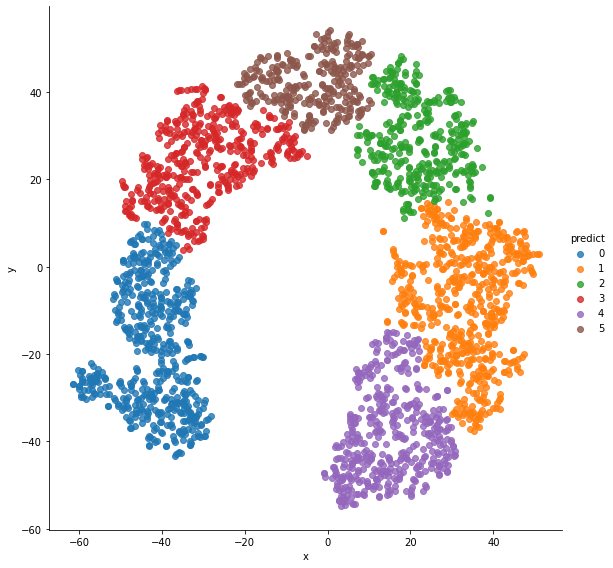

In [30]:
sns.lmplot('x','y',data=results, fit_reg=False, size=8, hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [32]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist


,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,39.661846,45.687344,44.884399,41.357713,43.987249,43.828430,44.820601,43.583779,44.149117,...,53.292480,67.424727,55.188322,67.675653,69.691888,56.886845,59.013787,64.109198,71.269635,65.923416
1,39.661846,0.000000,6.718516,5.715564,3.466046,5.829048,6.323572,16.971561,16.440054,19.409460,...,68.399191,51.617594,83.128286,57.114764,79.227186,49.067120,56.461713,48.237296,53.943695,52.576059
2,45.687344,6.718516,0.000000,1.047841,4.358711,2.033914,2.758155,14.335484,14.294423,17.341037,...,74.619153,54.543403,89.802208,60.771267,84.891911,53.453018,61.284515,51.299179,56.471962,55.922717
3,44.884399,5.715564,1.047841,0.000000,3.657089,1.969414,2.869970,14.835508,14.714169,17.778291,...,73.576763,53.815591,88.769098,59.960252,83.884221,52.559575,60.349626,50.552797,55.794687,55.145353
4,41.357713,3.466046,4.358711,3.657089,0.000000,2.757247,2.990773,13.790781,13.373455,16.407520,...,71.795150,54.560276,86.191005,60.267550,82.691977,52.373072,59.849626,51.213685,56.767571,55.641043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,56.886845,49.067120,53.453018,52.559575,52.373072,53.914138,54.712298,65.922434,65.307052,68.153339,...,34.915501,13.725696,59.887011,10.800313,36.430088,0.000000,9.068356,12.104774,17.746611,10.486104
2635,59.013787,56.461713,61.284515,60.349626,59.849626,61.584669,62.343159,73.178355,72.479284,75.228865,...,27.841403,20.324681,53.597133,13.273215,27.487511,9.068356,0.000000,19.857266,23.789279,16.406237
2636,64.109198,48.237296,51.299179,50.552797,51.213685,52.193994,53.073440,64.922386,64.516624,67.519423,...,46.868899,3.542240,71.975876,10.744844,46.701002,12.104774,19.857266,0.000000,7.163793,5.151540
2637,71.269635,53.943695,56.471962,55.794687,56.767571,57.526579,58.426459,70.398950,70.073044,73.109368,...,51.447931,4.119463,77.114296,11.430553,49.055479,17.746611,23.789279,7.163793,0.000000,7.490802


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

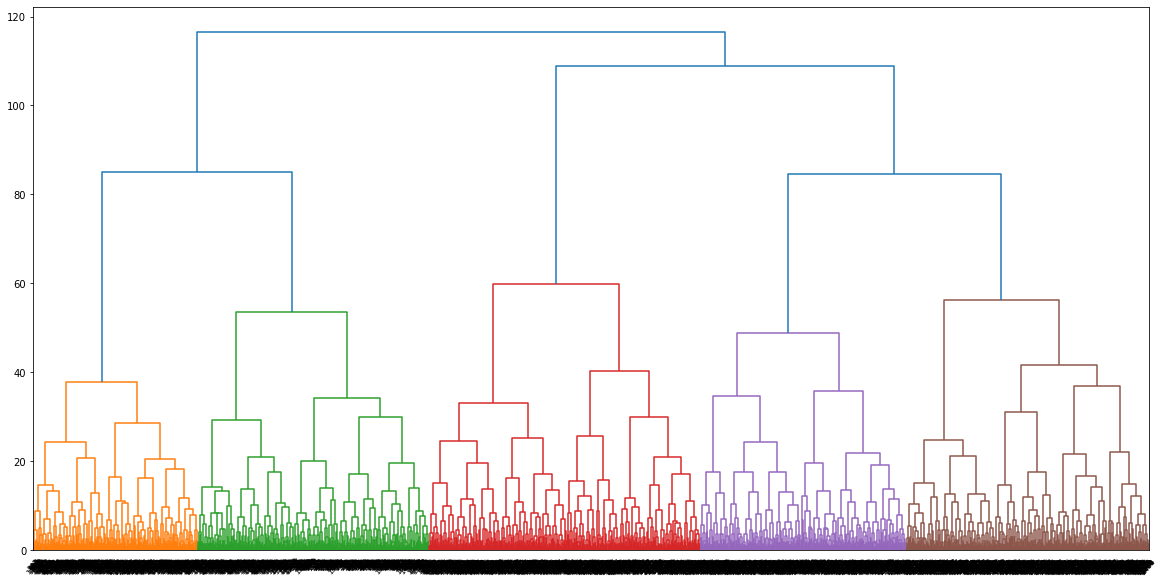

In [33]:
row_clusters = linkage(distmatrix, method = 'complete')
plt.figure(figsize=(20,10))
dendrogram(row_clusters, leaf_rotation=50, leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

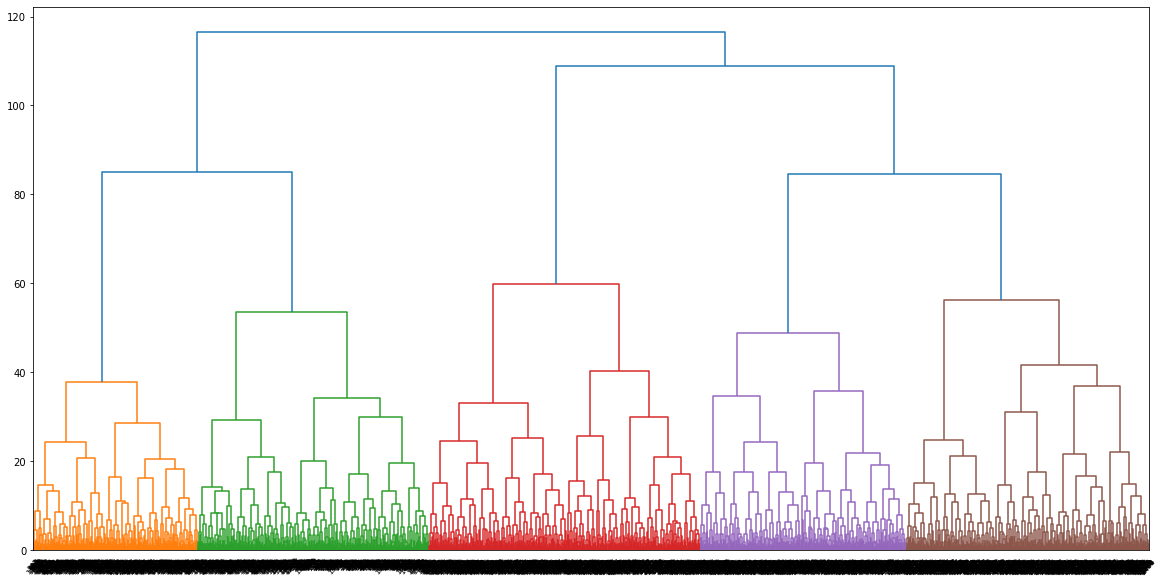

In [34]:
mergings = linkage(df, method='complete')
plt.figure(figsize=(20,10))
dendrogram(mergings, leaf_rotation=50, leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [37]:
results = df
results['predict'] = predict
results[0:10]

,x,y,redict,predict
어릴,-32.109364,5.881332,3,0
때,-42.779388,-32.081974,0,0
보,-47.395859,-36.963230,0,0
고,-46.498737,-36.421803,0,0
지금,-46.174603,-32.779106,0,0
다시,-47.838135,-34.977985,0,0
봐도,-48.624863,-34.494026,0,0
재밌,-59.525013,-29.321913,0,0
어요,-58.784157,-28.323948,0,0
ㅋㅋ,-61.462627,-26.822344,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


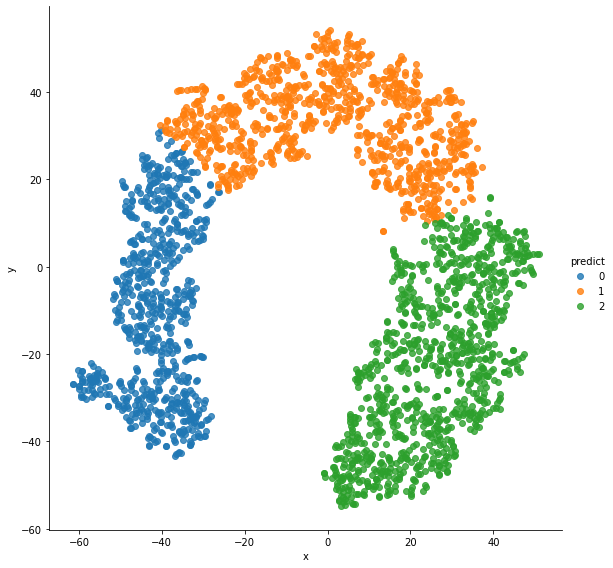

In [38]:
sns.lmplot('x','y',data=results, fit_reg=False, size=8, hue='predict')
plt.show()

### 클러스터 개수 6

In [39]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([4, 2, 2, ..., 5, 5, 5], dtype=int32)

In [40]:
results = df
results['predict'] = predict
results[0:10]

,x,y,redict,predict
어릴,-32.109364,5.881332,3,4
때,-42.779388,-32.081974,0,2
보,-47.395859,-36.963230,0,2
고,-46.498737,-36.421803,0,2
지금,-46.174603,-32.779106,0,2
다시,-47.838135,-34.977985,0,2
봐도,-48.624863,-34.494026,0,2
재밌,-59.525013,-29.321913,0,2
어요,-58.784157,-28.323948,0,2
ㅋㅋ,-61.462627,-26.822344,0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


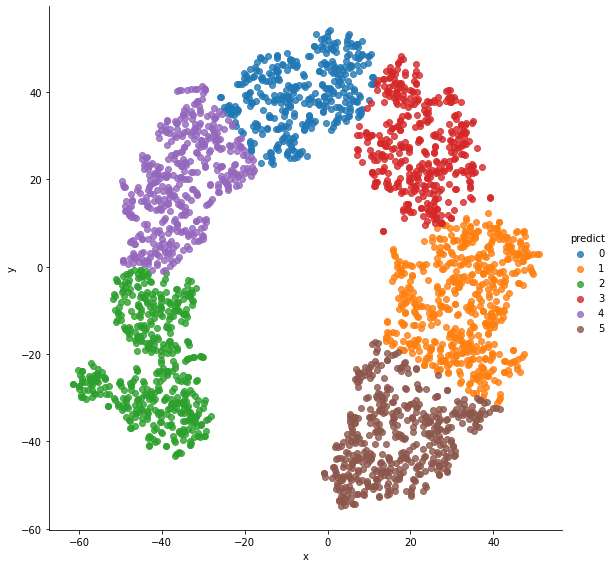

In [41]:
sns.lmplot('x','y',data=results, fit_reg=False, size=8, hue='predict')
plt.show()